# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>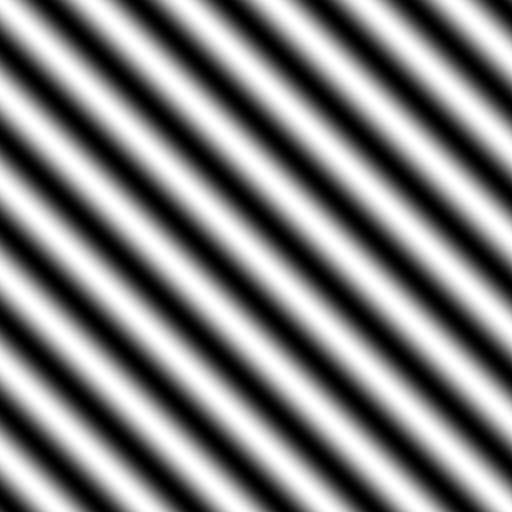</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import utils as ut

In [5]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `T_e=1`.


In [54]:
A=1
theta = 45
L = 512
T0 = 64
f0 = 1 /T0
Te=1
fe = 1/Te

<IPython.core.display.Javascript object>


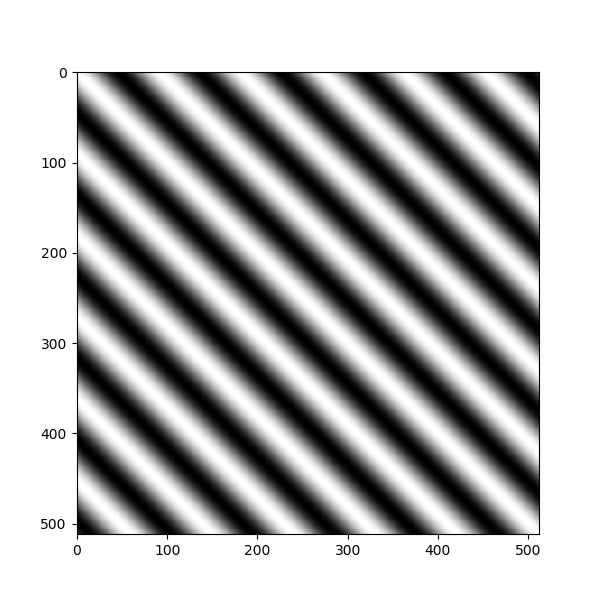

In [7]:
s45 = sinusoid2d(A, theta, L, T0, Te)
imshow(s45)

2. What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ is the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

apres avoir calculer TF de :  $$ s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta)) $$
on trouve : $$ S_\theta(t,u) = A/2 (\delta( f - f_0 \cos\theta) . \delta( f - f_0 \sin\theta) + \delta( f + f_0 \cos\theta) . \delta( f + f_0 \sin\theta))  $$
pour theta =45 , A = 1 et f0 = 1/T0= 1/64 on a : $$ f_t^{\text{max}} = 0.011   ,   f_u^{\text{max}} = 0.011 $$ 

    le fmax doit etre la frequence limit selon le theoreme de shannon (frequence échantillonnage au moins 2 fois la frequence max), au dessus de cela on aura des superposition de signal et des problemes lors de la reconstruction. 

2. (a)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


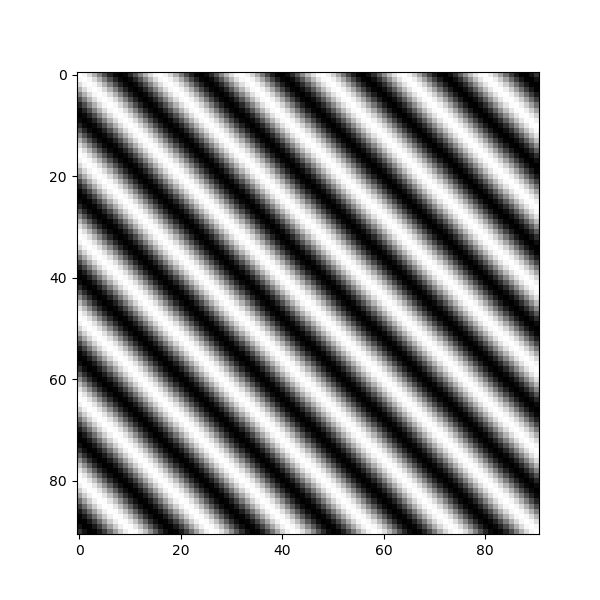

In [8]:
fm = 0.011
s45_fe_16fm = sinusoid2d(A, theta, L, T0, 1/(16*fm))
imshow(s45_fe_16fm)

2. (b) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


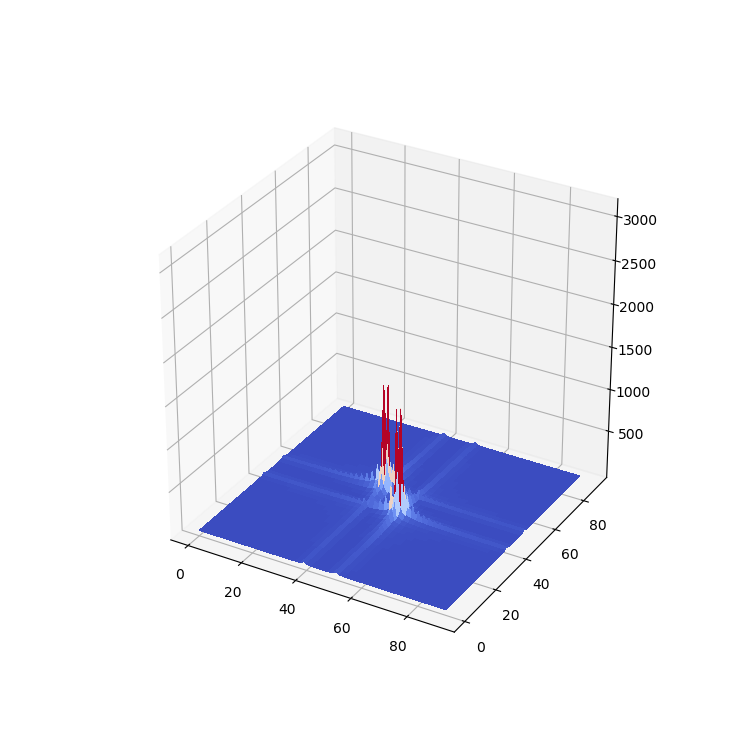

In [9]:
surf(ut.toVisualizeFT(ut.computeFT(s45_fe_16fm)))

    on voit bien que les deux diracs sont bien presente sur le schema ci-dessus.
    

2. (c) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

pour Te = 1/ 4*fm


<IPython.core.display.Javascript object>


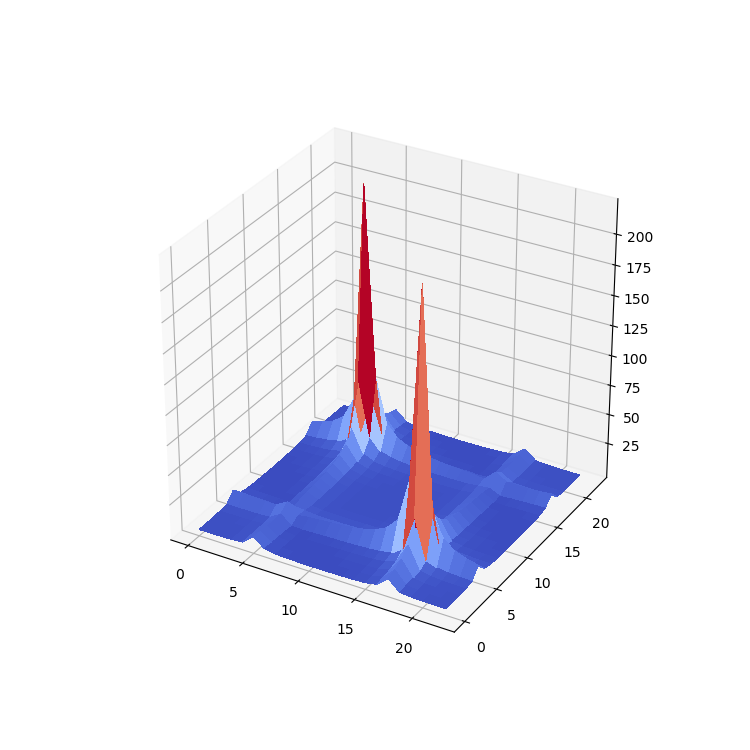

pour Te = 1/ 8*fm


<IPython.core.display.Javascript object>


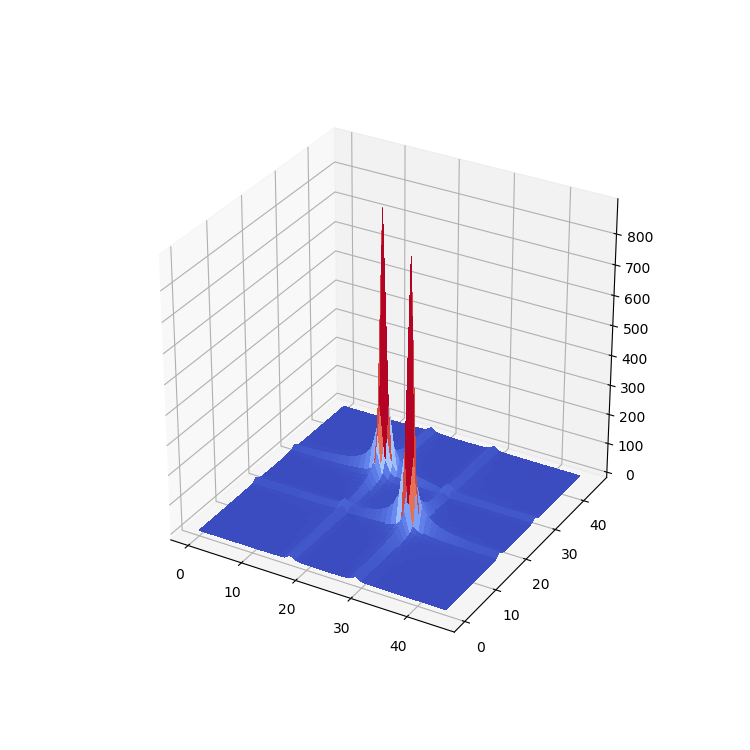

pour Te = 1/ 10*fm


<IPython.core.display.Javascript object>


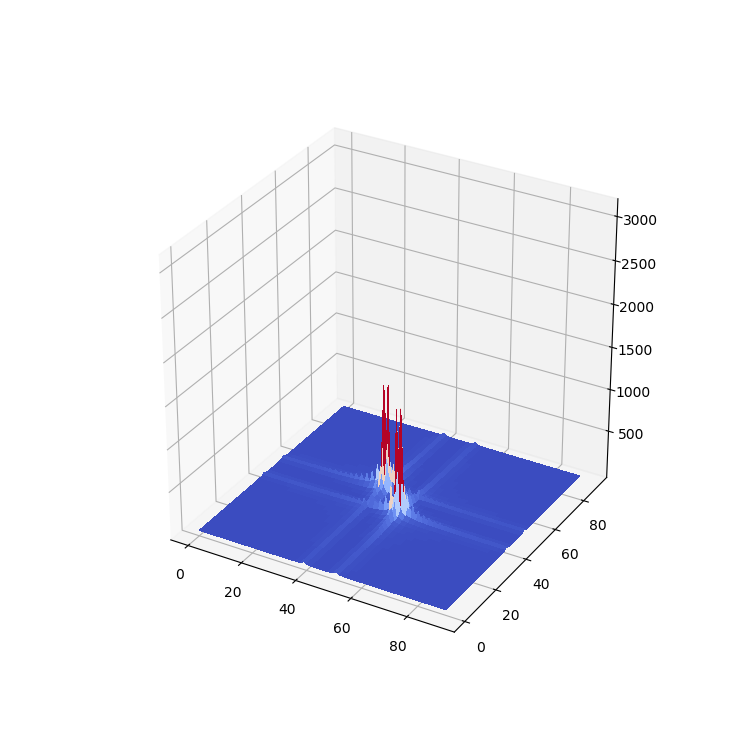

pour Te = 1/ 16*fm


<IPython.core.display.Javascript object>


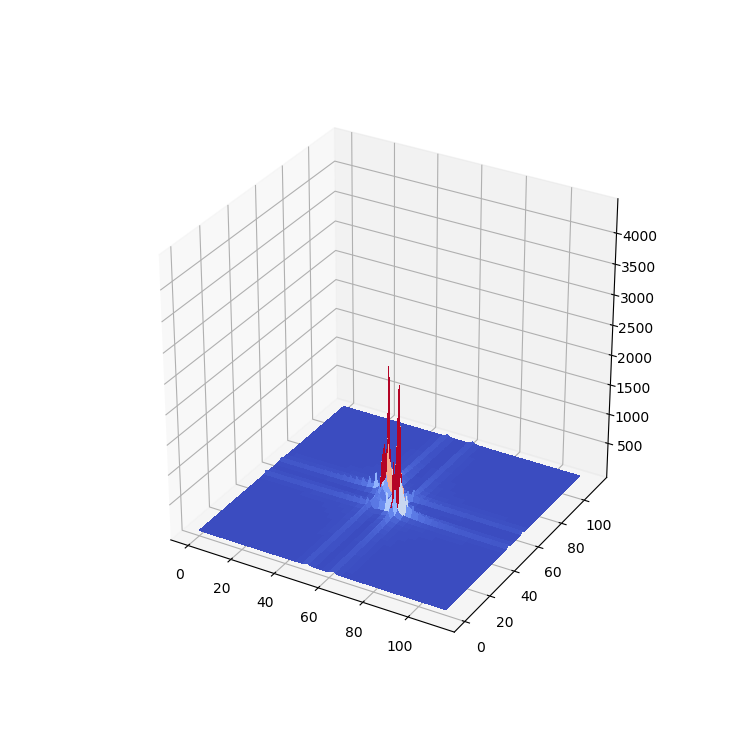

pour Te = 1/ 20*fm


In [10]:
print("pour Te = 1/ 4*fm")
surf(ut.toVisualizeFT(ut.computeFT(sinusoid2d(A, theta, L, T0, 1/(4*fm)))))
print("pour Te = 1/ 8*fm")
surf(ut.toVisualizeFT(ut.computeFT(sinusoid2d(A, theta, L, T0, 1/(8*fm)))))
print("pour Te = 1/ 10*fm")
surf(ut.toVisualizeFT(ut.computeFT(sinusoid2d(A, theta, L, T0, 1/(16*fm)))))
print("pour Te = 1/ 16*fm")
surf(ut.toVisualizeFT(ut.computeFT(sinusoid2d(A, theta, L, T0, 1/(20*fm)))))
print("pour Te = 1/ 20*fm")

    on remarque que a chaque fois qu'on diminue la frequence d'echentillionage les deux diracs s'élargissent, et devient plus fins de plus en plus quand fe augmante. et cela signifie que l'echentillionage devient de plus en plus précis en augmentant fe.
    
    les petits structures qui sont presentes a part des deux diracs sont liées a la superpositions des fonctions sinc des spectres ( valeurs discretes )

3. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


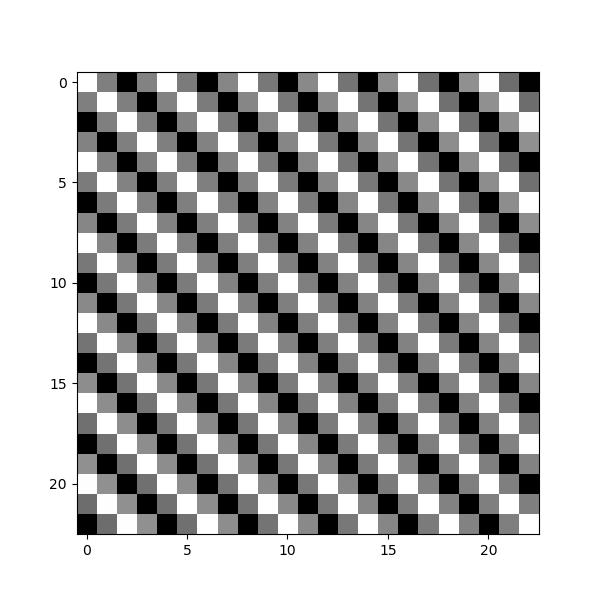

In [61]:
s45_f0_4fm = sinusoid2d(A, theta, L, T0, 1/(4*fm))
imshow(s45_f0_4fm)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [44]:
def error(Xr,Xd,A,L):
    return np.abs(Xr - Xd).sum() / (2*A* L*L)

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


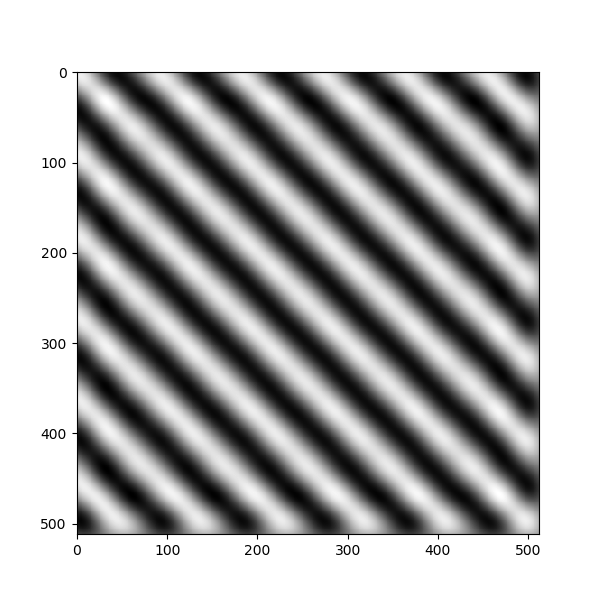

0.020814087383667954

In [64]:
rec_s45_f0_4fm = shannonInterpolation(s45_f0_4fm,1/(4*fm),L)
imshow(rec_s45_f0_4fm)
error(s45,rec_s45_f0_4fm,A,L)

    L'erreur etant de 2% petite comme valeur causée par l'echantillonage et peut etre negligé quand le theoreme de shannon est respecté

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

In [65]:
s45_fe_3_2fm = sinusoid2d(A, theta, L, T0, 1/(1.5*fm))
imshow(s45_fe_3_2fm)
rec_s45_fe_3_2fm = shannonInterpolation(s45_fe_3_2fm,1/(1.5*fm),L)
imshow(rec_s45_fe_3_2fm)
error(s45,rec_s45_fe_3_2fm,A,L)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.40784980942774196

    l'erreur est plus remarquable 40% quand la loi de shannon n'est pas respecté ( 1.5 fmax ). comme les signales se superpose et on aura des pertes en reconstruction d'image.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

en utilisant la meme methode au dessus on trouve : $$ S_\theta(t,u) = A/2 (\delta( f - f_0 \cos\theta) . \delta( f - f_0 \sin\theta) + \delta( f + f_0 \cos\theta) . \delta( f + f_0 \sin\theta))  $$
pour theta =10 , A = 1 et f0 = 1/T0= 1/64 on a : $$ f_t^{\text{max}} = 0.015   ,   f_u^{\text{max}} = 0.0027 $$ 

<IPython.core.display.Javascript object>


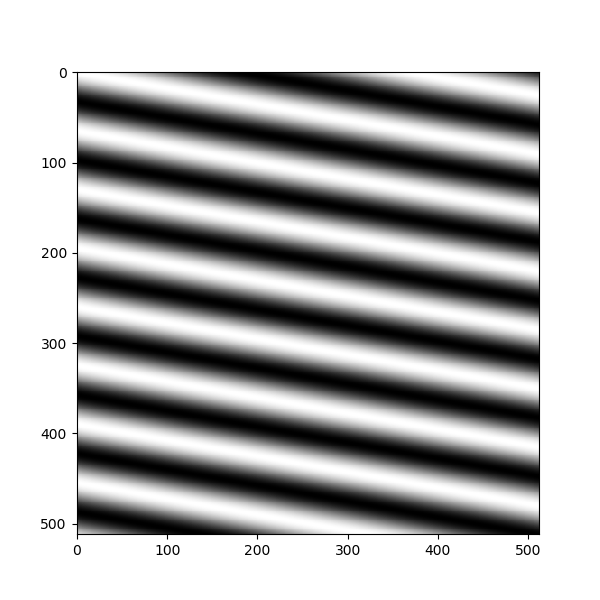

In [48]:
fm_10 = 0.015
s10 = sinusoid2d(A, 10, L, T0, Te)
imshow(s10)

<IPython.core.display.Javascript object>


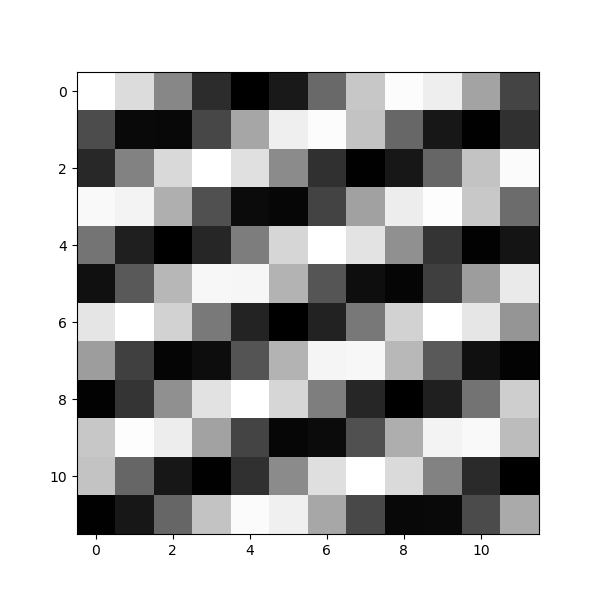

<IPython.core.display.Javascript object>


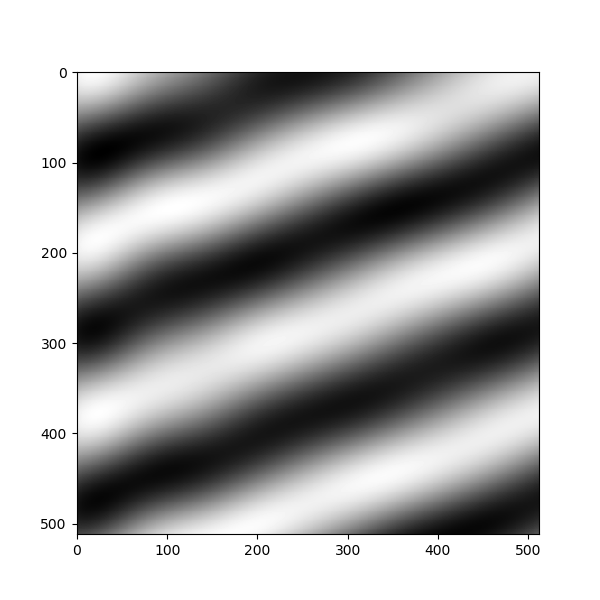

0.40050026113960707

In [51]:
s10_fe_3_2fm = sinusoid2d(A, 10, L, T0, 1/(1.5*fm_10))
imshow(s10_fe_3_2fm)
rec_s10_fe_3_2fm = shannonInterpolation(s10_fe_3_2fm,1/(1.5*fm),L)
imshow(rec_s10_fe_3_2fm)
error(s10,rec_s10_fe_3_2fm,A,L)

        avec un échantillonnage de 1.5 fmax, on remarque que les signal se superpose et a l'aire de se tourer dans l autre sens et c'est lié au fait que d'apres le theoreme de shannon la frequence minimum est 2fmax. pour mieux comprendre ci-dessous un exemple avec 3fmax on remarque bien avoir 2% d'erreur seulement qui est bien negligable.

<IPython.core.display.Javascript object>


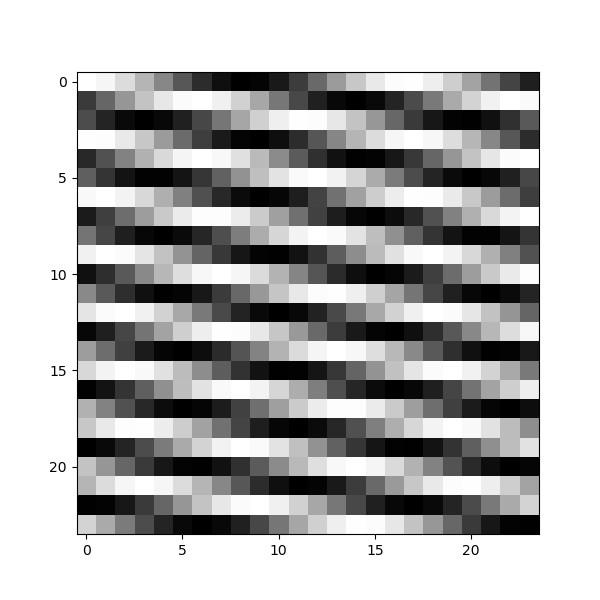

<IPython.core.display.Javascript object>


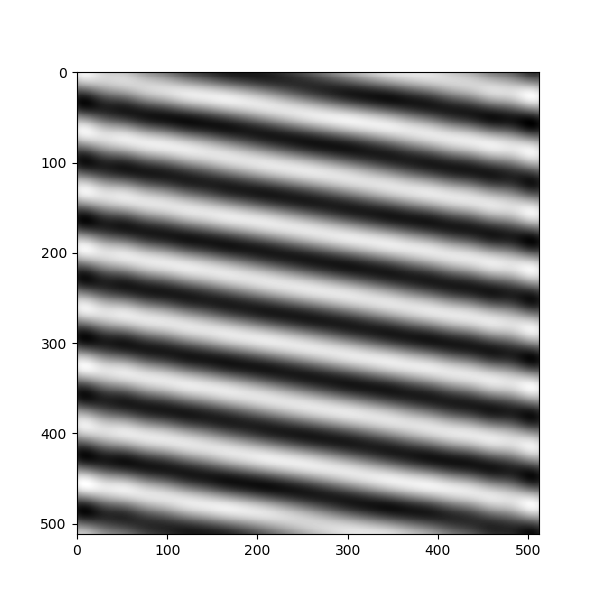

0.019187284246174906

In [72]:
s10_fe_3fm = sinusoid2d(A, 10, L, T0, 1/(3*fm_10))
imshow(s10_fe_3fm)
rec_s10_fe_3fm = shannonInterpolation(s10_fe_3fm,1/(3*fm_10),L)
imshow(rec_s10_fe_3fm)
error(s10,rec_s10_fe_3fm,A,L)

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [73]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below

def shannonInterpolationLoop(I, Te, size):
    n, m = I.shape
    X = np.zeros((size,n))
    Y = np.zeros((size,m))
    for s in range(size):
        for i in range(n):
            Y[s,i] = np.sinc(s/Te-i)  
        for j in range(m):
            X[s,j] = np.sinc(s/Te-j)
            
    return np.matmul(X.T, np.matmul(I, Y))

In [74]:
print("temps d'execution pour la fonction avec meshgrid : ")
tic()
shannonInterpolation(s45_f0_4fm,Te,64)
tac()
print("temps d'execution pour la fonction avec Loop : ")
tic()
shannonInterpolationLoop(sinusoid2d(A, theta, 64, T0, Te),Te,64)
tac()

temps d'execution pour la fonction avec meshgrid : 
0.015600100000000339
temps d'execution pour la fonction avec Loop : 
0.3588023000000078


    on remarque clairement que l'utilisation de meshgrid est plus rapide que les boucles


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [15]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]



1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

    c'est un sous-échantillonnage de facteur 2 qui prend 1 pixel sur deux de l'image, le resultat obtenu est une image compressé avec 1/2 de la taille originale. 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

    on remarque que le plus nous avons d'alisaing le plus de signal perdu dans le spectre, c'est un inconvinent car on perds de l'information et on rend l'image plus méconnaissable.

<IPython.core.display.Javascript object>


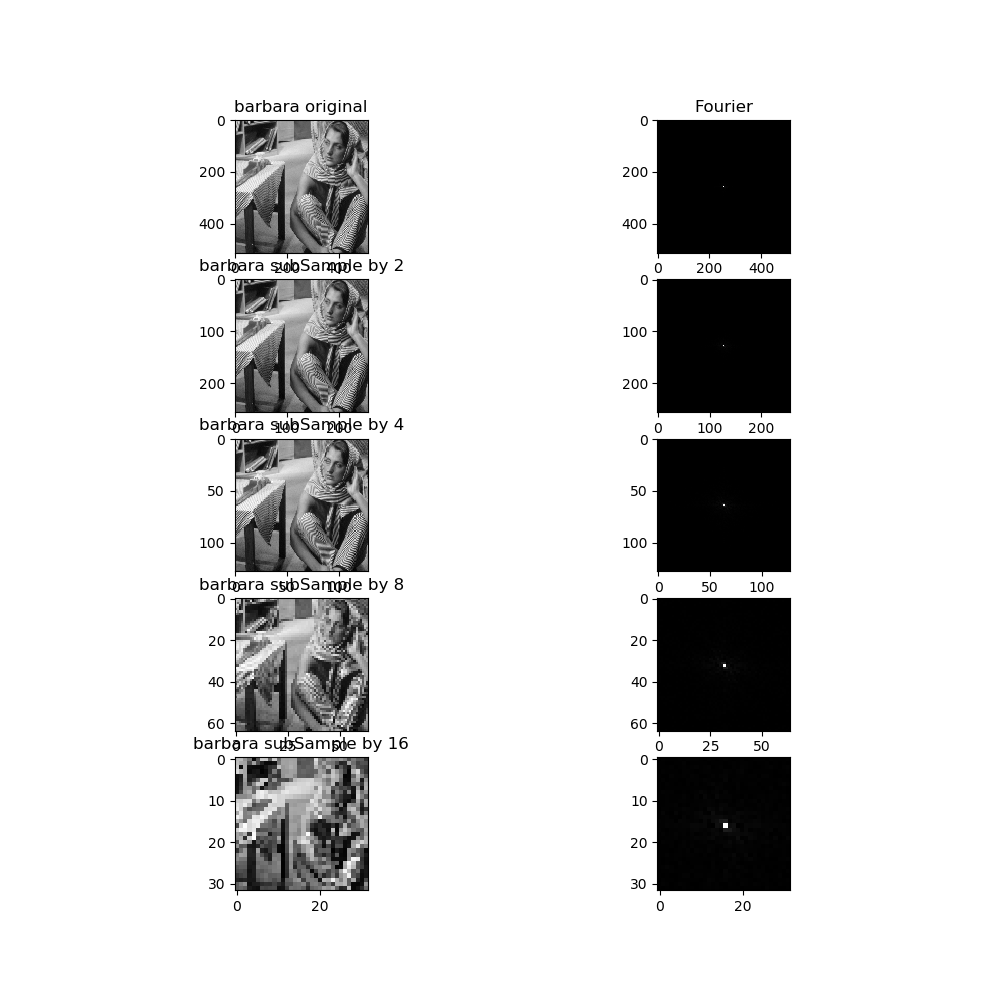

In [16]:
k=4
fig , ax = plt.subplots(k+1,2)
fig.set_figheight(10)
fig.set_figwidth(10)
ax[0][0].imshow(barbara)
ax[0][0].set_title("barbara original")
ax[0][1].imshow(ut.toVisualizeFT(ut.computeFT(barbara)))
ax[0][1].set_title("Fourier")
tmp = barbara.copy()
for i in range(k):
    tmp = subSample2(tmp)
    ax[i+1][0].imshow(tmp)
    ax[i+1][0].set_title("barbara subSample by {}".format(2 ** (i+1)))
    ax[i+1][1].imshow(ut.toVisualizeFT(ut.computeFT(tmp)))
plt.show()    

<IPython.core.display.Javascript object>


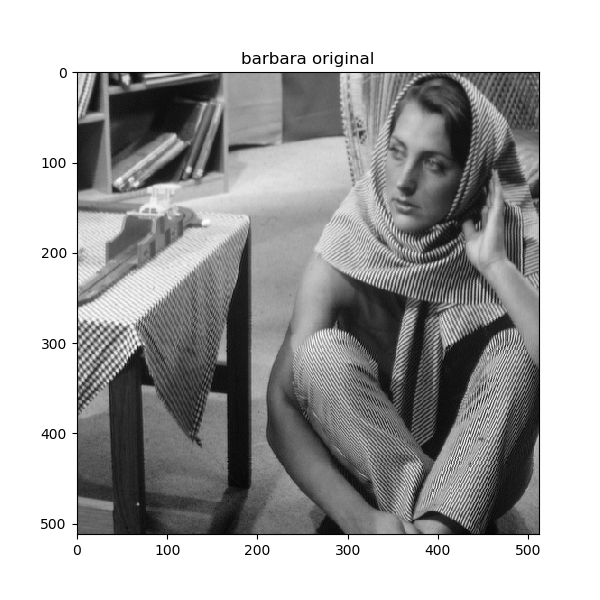

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


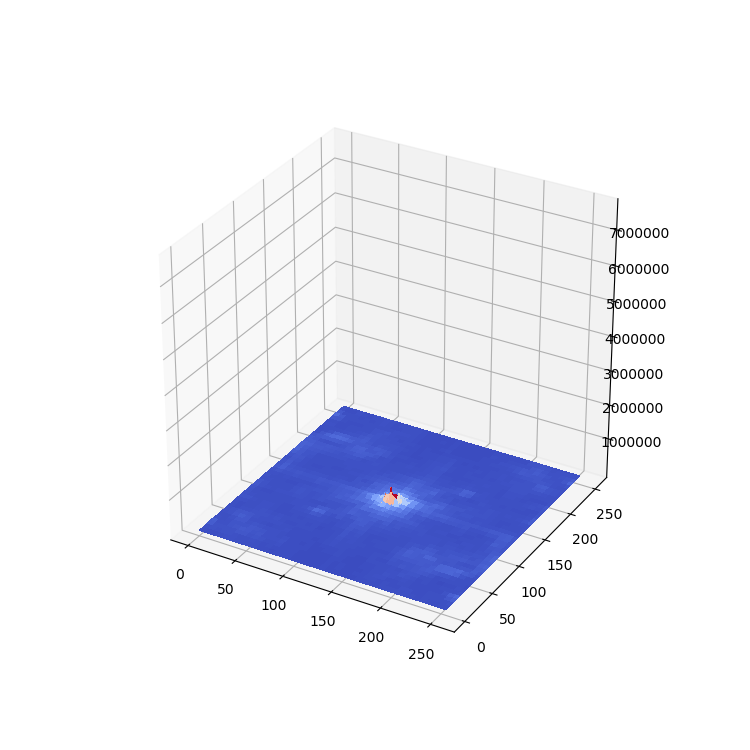

<IPython.core.display.Javascript object>


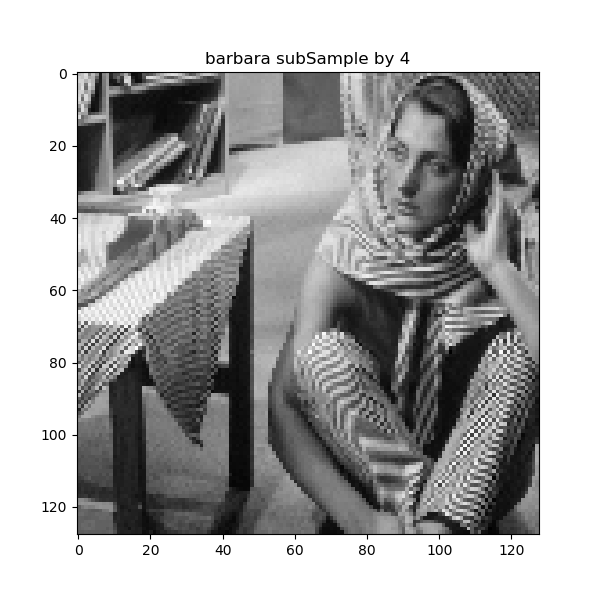

<IPython.core.display.Javascript object>


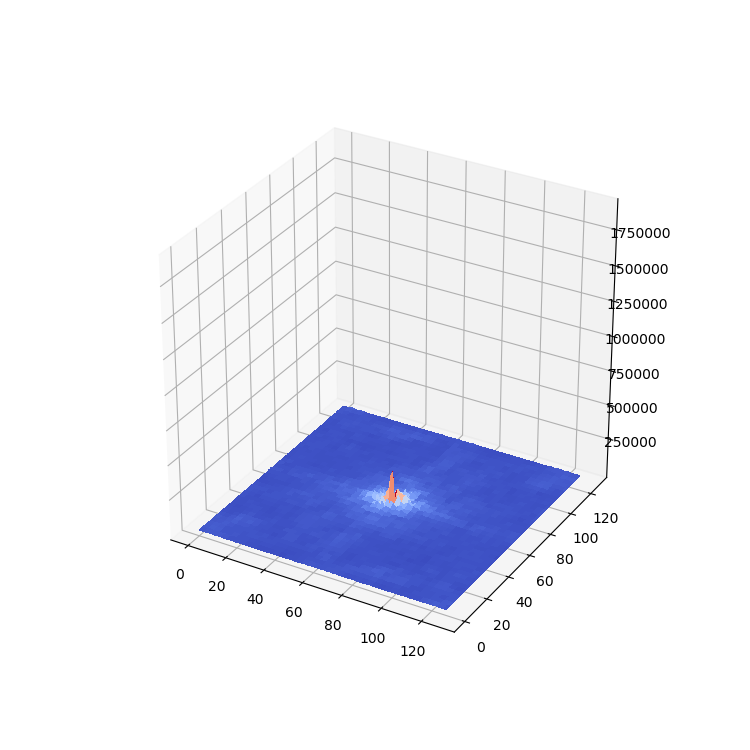

<IPython.core.display.Javascript object>


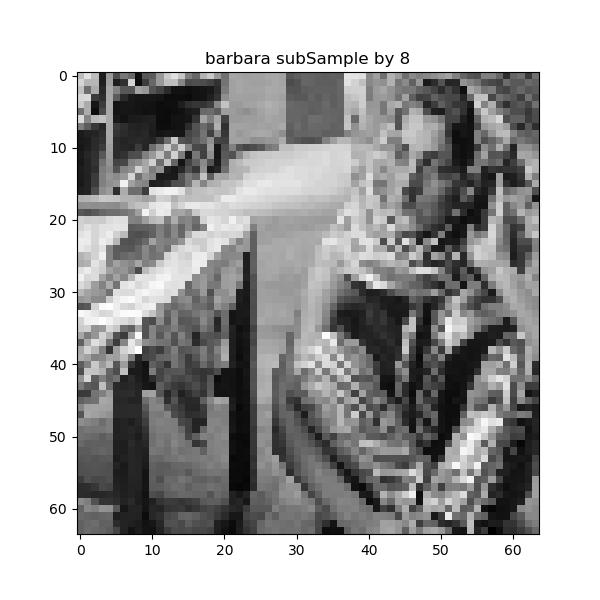

<IPython.core.display.Javascript object>


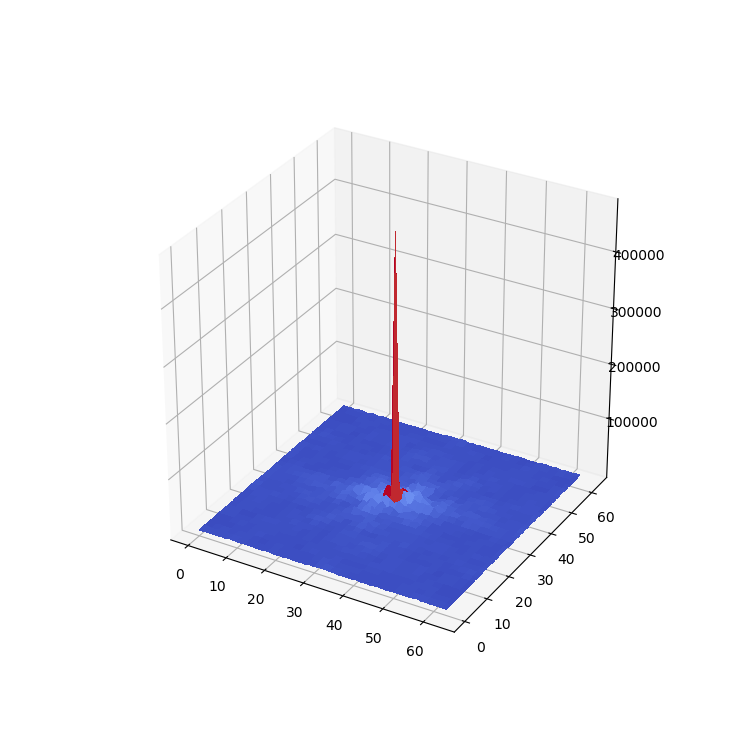

In [17]:
k=3

imshow(barbara,"barbara original")
surf(ut.toVisualizeFT(ut.computeFT(barbara)))
tmp = barbara.copy()
for i in range(k):
    tmp = subSample2(tmp)
    imshow(tmp,"barbara subSample by {}".format(2 ** (i+1)))
    surf(ut.toVisualizeFT(ut.computeFT(tmp)))

   

3. Bonus question: same question with the image `img/mandrill.png`.

In [23]:
mandrill = np.array(Image.open('img/mandrill.png'))

k=4
fig , ax = plt.subplots(k+1,2)
fig.set_figheight(10)
fig.set_figwidth(10)
ax[0][0].imshow(mandrill)
ax[0][0].set_title("mandrill original")
ax[0][1].imshow(ut.toVisualizeFT(ut.computeFT(mandrill)))
ax[0][1].set_title("Fourier")
tmp = mandrill.copy()
for i in range(k):
    tmp = subSample2(tmp)
    ax[i+1][0].imshow(tmp)
    ax[i+1][0].set_title("mandrill subSample by {}".format(2 ** (i+1)))
    ax[i+1][1].imshow(ut.toVisualizeFT(ut.computeFT(tmp)))
plt.show()    


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


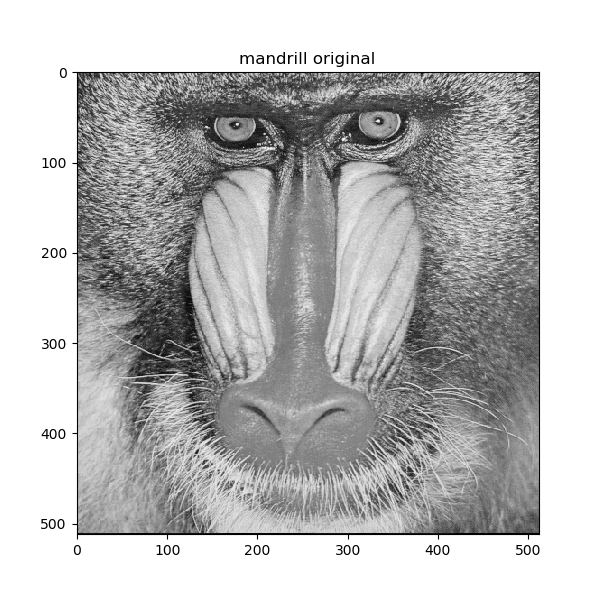

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


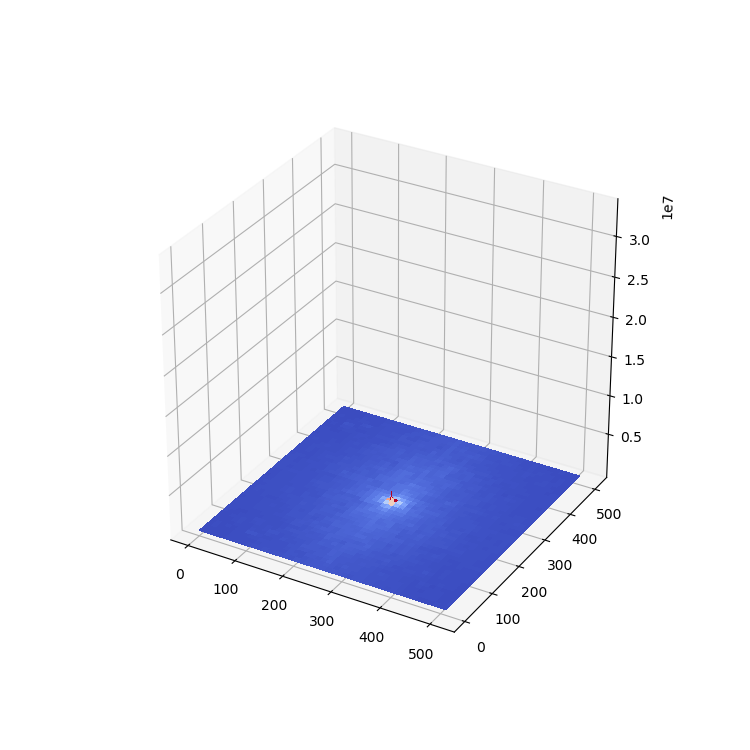

<IPython.core.display.Javascript object>


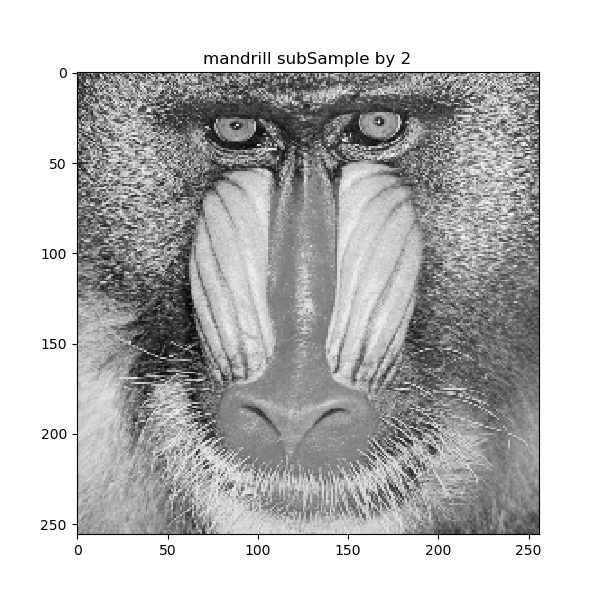

<IPython.core.display.Javascript object>


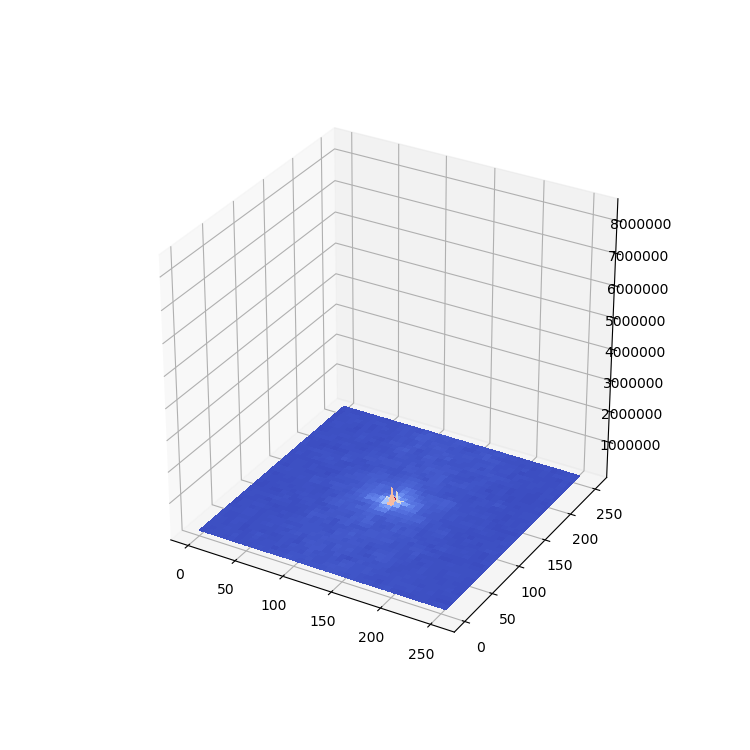

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


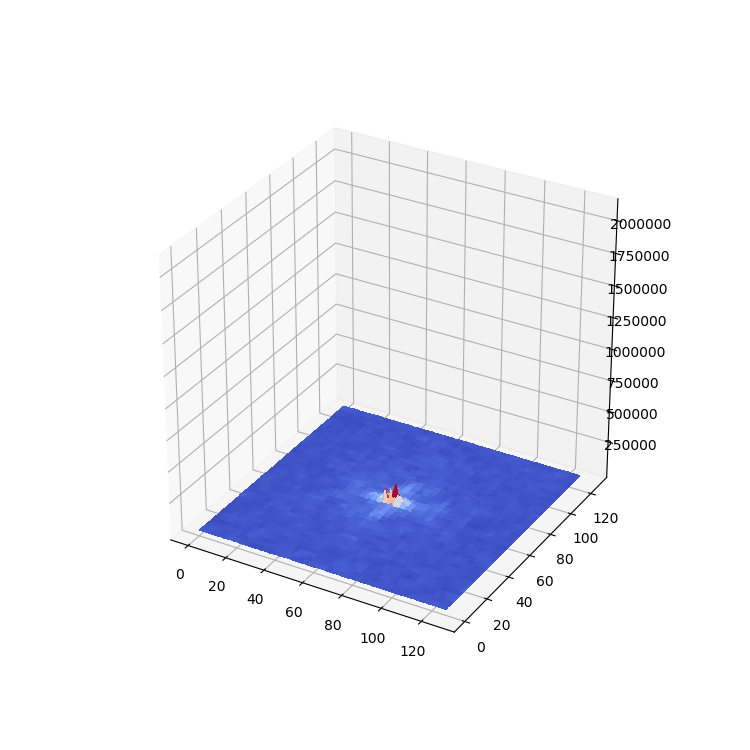

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


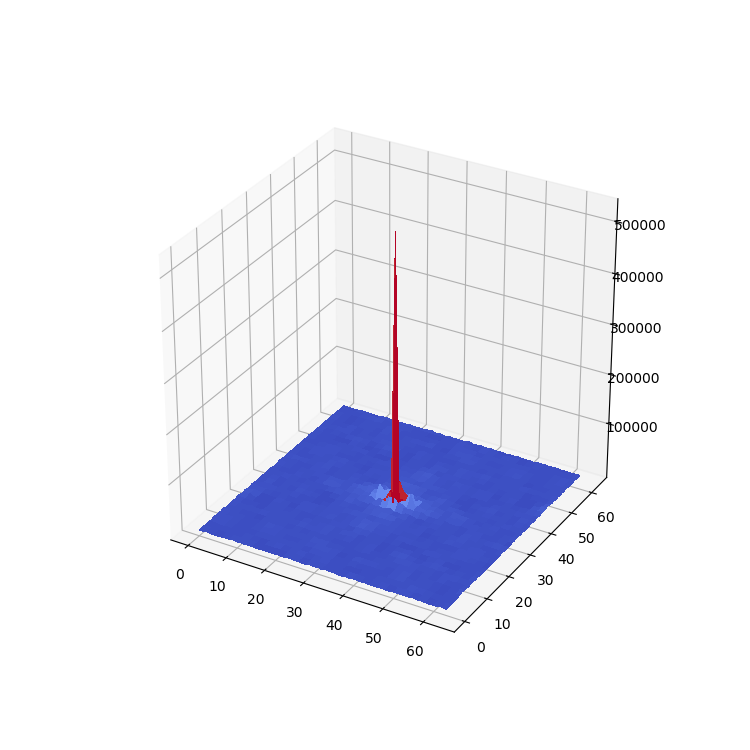

In [21]:
k=3

imshow(mandrill,"mandrill original")
surf(ut.toVisualizeFT(ut.computeFT(mandrill)))
tmp = mandrill.copy()
for i in range(k):
    tmp = subSample2(tmp)
    imshow(tmp,"mandrill subSample by {}".format(2 ** (i+1)))
    surf(ut.toVisualizeFT(ut.computeFT(tmp)))

   